# Airline Passenger Survey
---
### Basic Statistics And General Data Analysis

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
import numpy as np


#Import csv file to be analyzed airline_passenger_satisfaction
airline_pass_data = Path("Resources/airline_passenger_satisfaction.csv")
# Read the airline data and survey results
airline_data = pd.read_csv(airline_pass_data)

# Display the data table for preview
airline_data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [18]:
#checking our data
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [19]:
#for comfortable calculations let's replace all "0" in DF with NaN, so it would be ignored in calculations 
# Create a copy of the original DataFrame
survey_columns = [
    "Departure and Arrival Time Convenience", "Ease of Online Booking", "Check-in Service", 
    "Online Boarding", "Gate Location", "On-board Service", "Seat Comfort", "Leg Room Service",
    "Cleanliness", "Food and Drink", "In-flight Service", "In-flight Wifi Service", 
    "In-flight Entertainment", "Baggage Handling"
]

# Create a copy of the original DataFrame
airline_data_cleaned = airline_data.copy()

# Replace 0 with NaN in the specified survey columns
airline_data_cleaned[survey_columns] = airline_data_cleaned[survey_columns].replace(0, np.nan)

# Display the cleaned DataFrame
airline_data_cleaned.head()


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,Satisfied


In [20]:
#Total number of passengers in survey
total_passengers = airline_data_cleaned["ID"].nunique()
print (f"Total number of passengers in survey: {total_passengers}")

Total number of passengers in survey: 129880


In [ ]:
#Percent of Overall Satisfied and Neutral or Dissatisfied passengers -> pie chart


In [ ]:
# Checking the number of mice in the clean DataFrame.


### Customer Satisfaction Analysis


**Survey results by age**

In [21]:
#Establishing the bins
age_bins = [0, 12, 18, 25, 35, 45, 55, float('inf')]#covering all people older then 55
labels = ["0-12", "12-18","18-25","25-35","35-45","45-55",">55"]
# Create a copy of the data frame
passenger_age_df = airline_data_cleaned.copy()
passenger_age_df["Passenger Age Ranges"] = pd.cut(passenger_age_df["Age"], bins=age_bins, labels=labels)

passenger_age_df["Passenger Age Ranges"]=passenger_age_df["Passenger Age Ranges"].astype(str)
passenger_age_df
# passenger_age_df.index.name = 

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Passenger Age Ranges
0,1,Male,48,First-time,Business,Business,821,2,5.0,3.0,...,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,Neutral or Dissatisfied,45-55
1,2,Female,35,Returning,Business,Business,821,26,39.0,2.0,...,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,Satisfied,25-35
2,3,Male,41,Returning,Business,Business,853,0,0.0,4.0,...,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,Satisfied,35-45
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2.0,...,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,Satisfied,45-55
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3.0,...,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,Satisfied,45-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4.0,...,1.0,4.0,4.0,4.0,5.0,4.0,4.0,4,Neutral or Dissatisfied,25-35
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5.0,...,2.0,5.0,2.0,2.0,4.0,3.0,2.0,5,Neutral or Dissatisfied,35-45
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5.0,...,3.0,4.0,3.0,3.0,4.0,2.0,3.0,5,Neutral or Dissatisfied,35-45
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4.0,...,4.0,5.0,3.0,3.0,4.0,5.0,3.0,5,Satisfied,45-55


In [22]:
# calculate averages for survey observation withing the age group 
Schedule_Comfort_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Departure and Arrival Time Convenience"].mean()
Online_Booking_Comfort_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Ease of Online Booking"].mean()
Checkin_Service_Comfort_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Check-in Service"].mean()
Online_Boarding_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Online Boarding"].mean()
Gate_Location_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Gate Location"].mean()

Onboard_Service_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["On-board Service"].mean()
Seat_Comfort_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Seat Comfort"].mean()
Leg_Comfort_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Leg Room Service"].mean()
Cleanliness_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Cleanliness"].mean()
Food_Drink_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Food and Drink"].mean()

Inflight_Service_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["In-flight Service"].mean()
Inflight_Wifi_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["In-flight Wifi Service"].mean()
Inflight_Entertainment_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["In-flight Entertainment"].mean()
Baggage_age_score = passenger_age_df.groupby(["Passenger Age Ranges"])["Baggage Handling"].mean()

In [23]:
#Assembling into DataFrame
Age_Survey_df = pd.DataFrame({
    "Average Departure and Arrival Time Convenience": Schedule_Comfort_age_score,
    "Average Ease of Online Booking": Online_Booking_Comfort_age_score,
    "Averge Check-in Service": Checkin_Service_Comfort_age_score ,
    "Average Online Boarding": Online_Boarding_age_score,
    "Average Gate Location": Gate_Location_age_score,
    "Average On-board Service": Onboard_Service_age_score,
    "Average Seat Comfort": Seat_Comfort_age_score,
    "Average Leg Room Comfort": Leg_Comfort_age_score,
    "Average Cleanliness": Cleanliness_age_score,
    "Average Food & Drink": Food_Drink_age_score,
    "Average In-flight Service": Inflight_Service_age_score,
    "Average In-flight Entertainment": Inflight_Entertainment_age_score,
    "Average Baggage Handling": Baggage_age_score
})

#Display results
Age_Survey_df

,Average Departure and Arrival Time Convenience,Average Ease of Online Booking,Averge Check-in Service,Average Online Boarding,Average Gate Location,Average On-board Service,Average Seat Comfort,Average Leg Room Comfort,Average Cleanliness,Average Food & Drink,Average In-flight Service,Average In-flight Entertainment,Average Baggage Handling
Passenger Age Ranges,,,,,,,,,,,,,
0-12,3.514995,2.683794,3.224656,2.688582,2.924489,3.216729,2.950563,3.214435,2.996453,2.983065,3.707551,3.003130,3.678139
12-18,3.465793,2.779166,3.211440,2.827696,2.999681,3.191683,3.047801,3.208094,3.098980,3.090517,3.696144,3.113962,3.692001
18-25,3.258022,2.933645,3.237502,3.050053,2.961001,3.253289,3.112670,3.207975,3.168831,3.160604,3.693621,3.165204,3.690288
25-35,3.160743,2.844112,3.239606,3.109091,2.988461,3.269557,3.273842,3.250976,3.270672,3.250478,3.671517,3.292563,3.641100
35-45,3.131108,2.919150,3.330611,3.453741,2.989287,3.474458,3.560459,3.486739,3.336654,3.225995,3.653776,3.467991,3.649051
45-55,3.183610,2.934884,3.421243,3.670795,2.984945,3.556754,3.745836,3.544938,3.427074,3.267948,3.659704,3.559803,3.652769
>55,3.312700,2.844098,3.305090,3.474340,2.954509,3.361923,3.571126,3.310650,3.274778,3.184602,3.500329,3.333490,3.497533


**Bar chart average cleanliness**

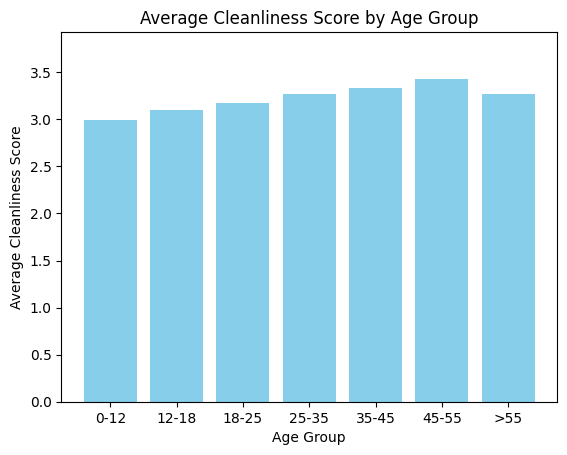

In [24]:
# Extract the data for "Average Cleanliness" by age group
average_cleanliness = Age_Survey_df["Average Cleanliness"]
x_axis = average_cleanliness.index.values
y_axis = average_cleanliness.values
#Create a Pyplot bar plot based off the group series from before and label the title
plt.bar(x_axis, y_axis, color = "skyblue", alpha = 1, align = "center")

# Set chart title and labels
plt.title('Average Cleanliness Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cleanliness Score')
plt.ylim(0, y_axis.max() + 0.5)

# Show the plot
# plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()


**Survey results by class of travel**

In [25]:
# Grouping the summary and creating DataFrame with Survey results by class of traveling:
class_of_service_df = airline_data_cleaned.copy()

Schedule_Comfort_class_score = class_of_service_df.groupby(["Class"])["Departure and Arrival Time Convenience"].mean()
Online_Booking_Comfort_class_score = class_of_service_df.groupby(["Class"])["Ease of Online Booking"].mean()
Checkin_Service_Comfort_class_score = class_of_service_df.groupby(["Class"])["Check-in Service"].mean()
Online_Boarding_class_score = class_of_service_df.groupby(["Class"])["Online Boarding"].mean()
Gate_Location_class_score = class_of_service_df.groupby(["Class"])["Gate Location"].mean()

Onboard_Service_class_score = class_of_service_df.groupby(["Class"])["On-board Service"].mean()
Seat_Comfort_class_score = class_of_service_df.groupby(["Class"])["Seat Comfort"].mean()
Leg_Comfort_class_score = class_of_service_df.groupby(["Class"])["Leg Room Service"].mean()
Cleanliness_class_score = class_of_service_df.groupby(["Class"])["Cleanliness"].mean()
Food_Drink_class_score = class_of_service_df.groupby(["Class"])["Food and Drink"].mean()

Inflight_Service_class_score = class_of_service_df.groupby(["Class"])["In-flight Service"].mean()
Inflight_Wifi_class_score = class_of_service_df.groupby(["Class"])["In-flight Wifi Service"].mean()
Inflight_Entertainment_class_score = class_of_service_df.groupby(["Class"])["In-flight Entertainment"].mean()
Baggage_class_score = class_of_service_df.groupby(["Class"])["Baggage Handling"].mean()

# Assembling into a DataFrame
Class_Survey_df = pd.DataFrame({
    "Average Departure and Arrival Time Convenience": Schedule_Comfort_class_score,
    "Average Ease of Online Booking": Online_Booking_Comfort_class_score,
    "Average Check-in Service": Checkin_Service_Comfort_class_score,
    "Average Online Boarding": Online_Boarding_class_score,
    "Average Gate Location": Gate_Location_class_score,
    "Average On-board Service": Onboard_Service_class_score,
    "Average Seat Comfort": Seat_Comfort_class_score,
    "Average Leg Room Comfort": Leg_Comfort_class_score,
    "Average Cleanliness": Cleanliness_class_score,
    "Average Food & Drink": Food_Drink_class_score,
    "Average In-flight Service": Inflight_Service_class_score,
    "Average In-flight Wifi Service": Inflight_Wifi_class_score,
    "Average In-flight Entertainment": Inflight_Entertainment_class_score,
    "Average Baggage Handling": Baggage_class_score
})

# Display the resulting DataFrame
Class_Survey_df.index.name = "Class of Service"
Class_Survey_df


,Average Departure and Arrival Time Convenience,Average Ease of Online Booking,Average Check-in Service,Average Online Boarding,Average Gate Location,Average On-board Service,Average Seat Comfort,Average Leg Room Comfort,Average Cleanliness,Average Food & Drink,Average In-flight Service,Average In-flight Wifi Service,Average In-flight Entertainment,Average Baggage Handling
Class of Service,,,,,,,,,,,,,,
Business,3.047442,3.044260,3.521067,3.759860,2.985151,3.682825,3.763767,3.655334,3.482222,3.331938,3.846577,2.891755,3.639819,3.844852
Economy,3.398372,2.724554,3.124423,2.917292,2.969576,3.119707,3.141813,3.104328,3.105034,3.090425,3.466497,2.728649,3.096784,3.450617
Economy Plus,3.317119,2.796606,3.014557,2.998344,2.968441,3.036234,3.168207,3.073848,3.120468,3.117691,3.382850,2.833406,3.122488,3.351504


**Class of Service Pie Chart**

<Axes: title={'center': 'On-board Service'}, xlabel='Class'>

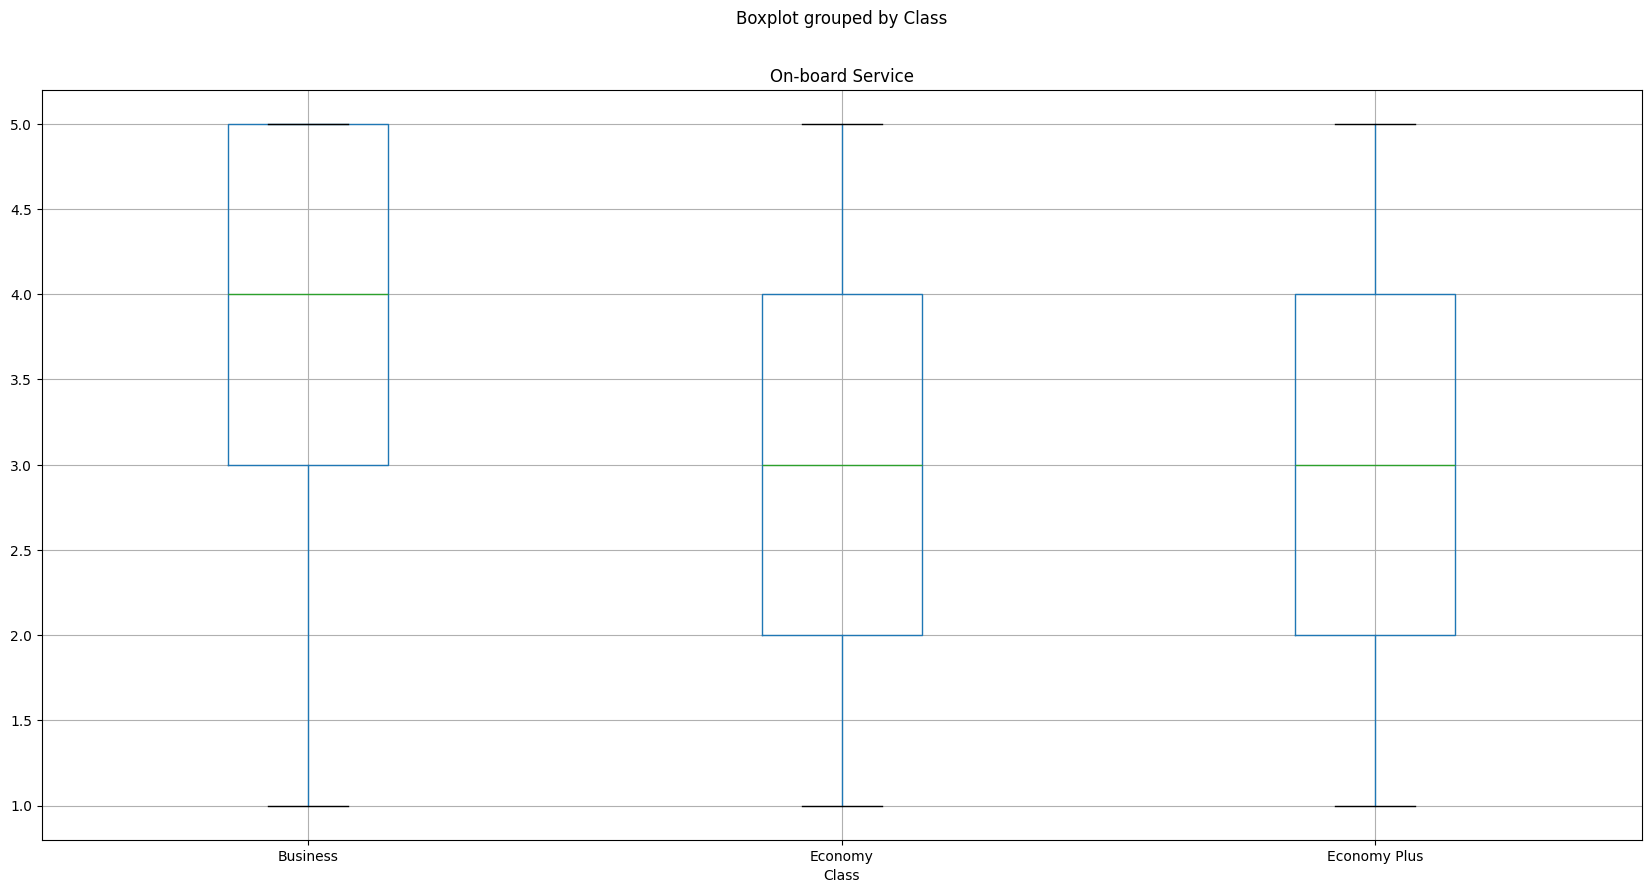

In [26]:

# ANOVA analysis class of service and satisfaction of onboard service

airline_data_cleaned.boxplot("On-board Service", by="Class", figsize=(20,10))

<Axes: title={'center': 'Online Boarding'}, xlabel='Class'>

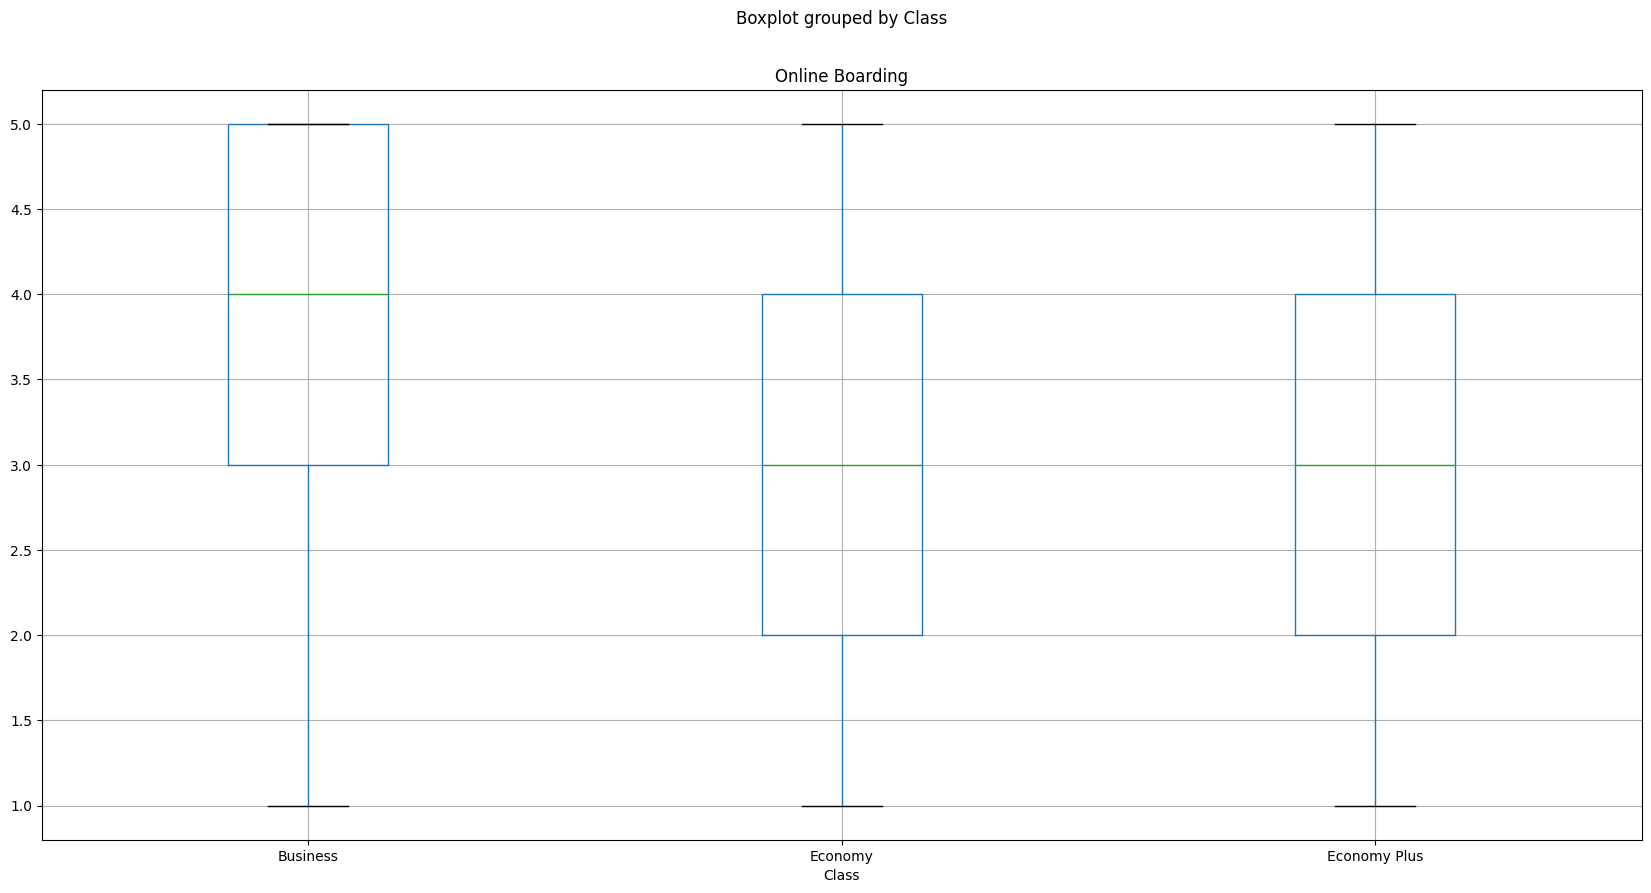

In [27]:
airline_data_cleaned.boxplot("Online Boarding", by="Class", figsize=(20,10))

In [28]:
group0 = airline_data_cleaned[airline_data_cleaned["Class"] == 0]["On-board Service"]
group1 = airline_data_cleaned[airline_data_cleaned["Class"] == 1]["On-board Service"]
group2 = airline_data_cleaned[airline_data_cleaned["Class"] == 3]["On-board Service"]

In [29]:
stats.f_oneway(group0, group1, group2)


NameError: name 'stats' is not defined

In [ ]:
# Generate a box plot that shows the 


In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
